## ICP 11 Autoencoder

### Hema Sai Ari

In [1]:
import numpy as np
from matplotlib import pyplot as plt


from tensorflow.keras.datasets import mnist

from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential


### Load and normalize our data

In [2]:



# load MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)
print(test_images.shape)

# Flatten the images for a autoencoder input (28x28 is 784 -- therfore, input is 784 neurons)
train_images = np.reshape(train_images, (-1, 784))
test_images = np.reshape(test_images, (-1, 784))
print(train_images.shape)
print(test_images.shape)

# Normalize data - since it's grayscale, we can divide by 255 to get each pixel between 0 and 1
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

11490434/11490434 [==============================] - 1s 0us/step
(60000, 28, 28)
(10000, 28, 28)
(60000, 784)
(10000, 784)


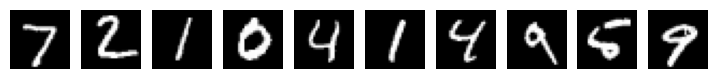

In [3]:


n = 10
plt.figure(figsize=(9, 2))
for i in range(n):
  ax = plt.subplot(1, n, i+1)
  plt.imshow(test_images[i].reshape(28, 28), cmap="gray")
  ax.axis('off')

plt.show()

### Create an autoencoder model(bottle neck=6


In [4]:


input_dim = 28*28
latent_vec_len = 6 # this is the 'bottleneck' of the autoencoder

# Define the autoencoder architecture
# build the encoder
autoencoder = Sequential()
autoencoder.add(Input(shape=(input_dim,)))
autoencoder.add(Dense(500, activation='relu'))
autoencoder.add(Dense(300, activation='relu'))
autoencoder.add(Dense(100, activation='relu'))

# the bottleneck layer
autoencoder.add(Dense(latent_vec_len, activation='relu'))

# the decoder layer
autoencoder.add(Dense(100, activation='relu'))
autoencoder.add(Dense(300, activation='relu'))
autoencoder.add(Dense(500, activation='relu'))
autoencoder.add(Dense(input_dim, activation='sigmoid'))

# Compile the autoencoder model
autoencoder.compile(loss='binary_crossentropy', optimizer='adam')

# Get summary
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               392500    
                                                                 
 dense_1 (Dense)             (None, 300)               150300    
                                                                 
 dense_2 (Dense)             (None, 100)               30100     
                                                                 
 dense_3 (Dense)             (None, 6)                 606       
                                                                 
 dense_4 (Dense)             (None, 100)               700       
                                                                 
 dense_5 (Dense)             (None, 300)               30300     
                                                                 
 dense_6 (Dense)             (None, 500)               1

### Train the autoencoder model.

In [5]:
from tensorflow.keras.callbacks import EarlyStopping # EarlyStopping during model training


# Train the autoencoder with MNIST data
early_stop = EarlyStopping(monitor='loss', patience=3, verbose=1)
history = autoencoder.fit(
    x=train_images, # For autoencoders, both the input and the target are the same
    y=train_images, 
    epochs=10, 
    batch_size=128,
    shuffle=True, 
    validation_data=(test_images, test_images),
    callbacks=[early_stop]
)



Epoch 1/10
469/469 [==============================] - 32s 51ms/step - loss: 0.2104 - val_loss: 0.1675
Epoch 2/10
469/469 [==============================] - 19s 40ms/step - loss: 0.1616 - val_loss: 0.1566
Epoch 3/10
469/469 [==============================] - 21s 45ms/step - loss: 0.1485 - val_loss: 0.1442
Epoch 4/10
469/469 [==============================] - 19s 40ms/step - loss: 0.1423 - val_loss: 0.1406
Epoch 5/10
469/469 [==============================] - 20s 44ms/step - loss: 0.1393 - val_loss: 0.1382
Epoch 6/10
469/469 [==============================] - 19s 40ms/step - loss: 0.1371 - val_loss: 0.1371
Epoch 7/10
469/469 [==============================] - 21s 44ms/step - loss: 0.1353 - val_loss: 0.1357
Epoch 8/10
469/469 [==============================] - 19s 40ms/step - loss: 0.1337 - val_loss: 0.1338
Epoch 9/10
469/469 [==============================] - 20s 42ms/step - loss: 0.1324 - val_loss: 0.1336
Epoch 10/10
469/469 [==============================] - 19s 41ms/step - loss: 0.131

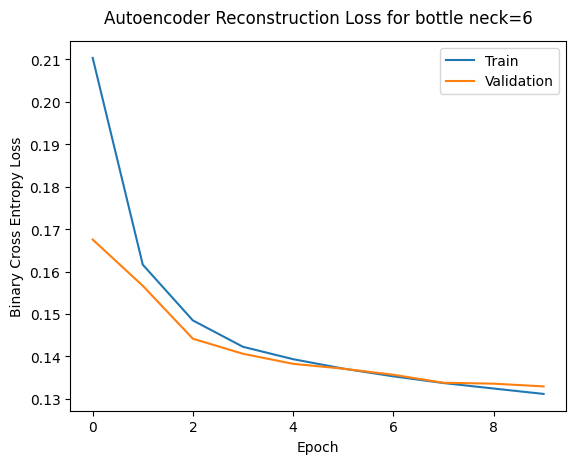

In [6]:
# Plot training and validation loss scores
# against the number of epochs.

plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.ylabel('Binary Cross Entropy Loss')
plt.xlabel('Epoch')
plt.title('Autoencoder Reconstruction Loss for bottle neck=6', pad=13)
plt.legend(loc='upper right')

### Test the autoencoder model by reconstructing the test images and visually inspecting the results.

313/313 [==============================] - 2s 5ms/step


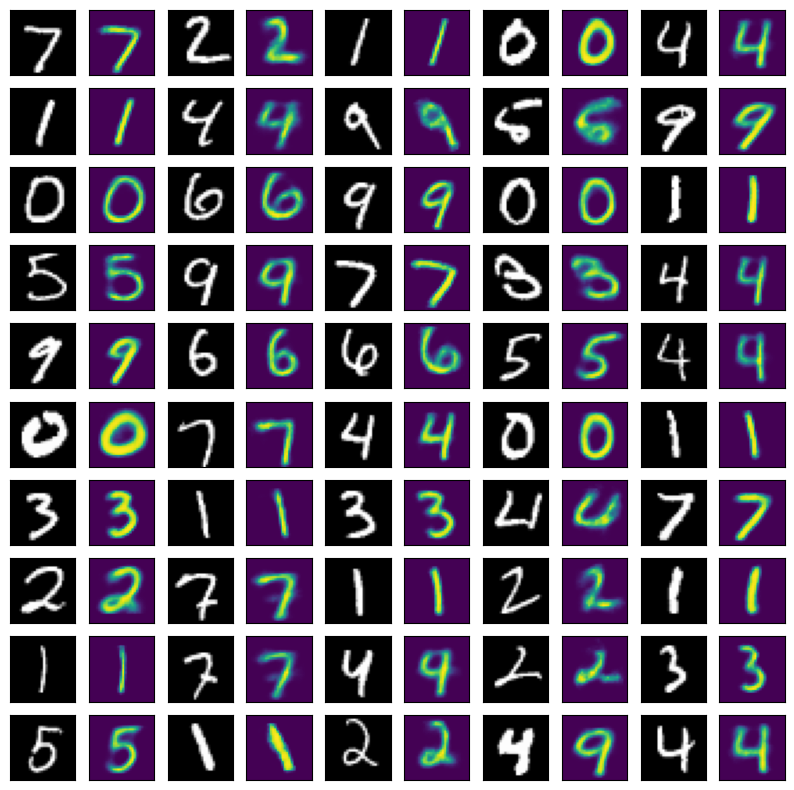

In [7]:
reconstructed_images = autoencoder.predict(test_images)

images = []
for i in range(100):
    images.append(test_images[i].reshape(28,28))
    images.append(reconstructed_images[i].reshape(28,28))
rows = 10
cols = 10
plt.figure(figsize=(10,10))
for i in range(rows*cols):
    plt.subplot(rows,cols,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if (i%2 == 0):
        plt.imshow(images[i],cmap='gray')
    else:
        plt.imshow(images[i])
plt.show()

### Create an autoencoder model(bottle neck=100)

In [8]:


input_dim = 28*28
latent_vec_len = 100 # this is the 'bottleneck' of the autoencoder

# Define the autoencoder architecture
# build the encoder
autoencoder = Sequential()
autoencoder.add(Input(shape=(input_dim,)))
autoencoder.add(Dense(500, activation='relu'))
autoencoder.add(Dense(300, activation='relu'))
autoencoder.add(Dense(100, activation='relu'))

# the bottleneck layer
autoencoder.add(Dense(latent_vec_len, activation='relu'))

# the decoder layer
autoencoder.add(Dense(100, activation='relu'))
autoencoder.add(Dense(300, activation='relu'))
autoencoder.add(Dense(500, activation='relu'))
autoencoder.add(Dense(input_dim, activation='sigmoid'))

# Compile the autoencoder model
autoencoder.compile(loss='binary_crossentropy', optimizer='adam')

# Get summary
autoencoder.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 500)               392500    
                                                                 
 dense_9 (Dense)             (None, 300)               150300    
                                                                 
 dense_10 (Dense)            (None, 100)               30100     
                                                                 
 dense_11 (Dense)            (None, 100)               10100     
                                                                 
 dense_12 (Dense)            (None, 100)               10100     
                                                                 
 dense_13 (Dense)            (None, 300)               30300     
                                                                 
 dense_14 (Dense)            (None, 500)              

### Train the autoencoder model.

In [9]:
from tensorflow.keras.callbacks import EarlyStopping # EarlyStopping during model training


# Train the autoencoder with MNIST data
early_stop = EarlyStopping(monitor='loss', patience=3, verbose=1)
history = autoencoder.fit(
    x=train_images, # For autoencoders, both the input and the target are the same
    y=train_images, 
    epochs=10, 
    batch_size=128,
    shuffle=True, 
    validation_data=(test_images, test_images),
    callbacks=[early_stop]
)



Epoch 1/10
469/469 [==============================] - 20s 40ms/step - loss: 0.1782 - val_loss: 0.1239
Epoch 2/10
469/469 [==============================] - 20s 42ms/step - loss: 0.1123 - val_loss: 0.1024
Epoch 3/10
469/469 [==============================] - 19s 40ms/step - loss: 0.0990 - val_loss: 0.0951
Epoch 4/10
469/469 [==============================] - 21s 45ms/step - loss: 0.0930 - val_loss: 0.0917
Epoch 5/10
469/469 [==============================] - 19s 40ms/step - loss: 0.0894 - val_loss: 0.0876
Epoch 6/10
469/469 [==============================] - 20s 42ms/step - loss: 0.0869 - val_loss: 0.0855
Epoch 7/10
469/469 [==============================] - 19s 40ms/step - loss: 0.0850 - val_loss: 0.0839
Epoch 8/10
469/469 [==============================] - 20s 42ms/step - loss: 0.0835 - val_loss: 0.0829
Epoch 9/10
469/469 [==============================] - 19s 40ms/step - loss: 0.0821 - val_loss: 0.0816
Epoch 10/10
469/469 [==============================] - 21s 44ms/step - loss: 0.081

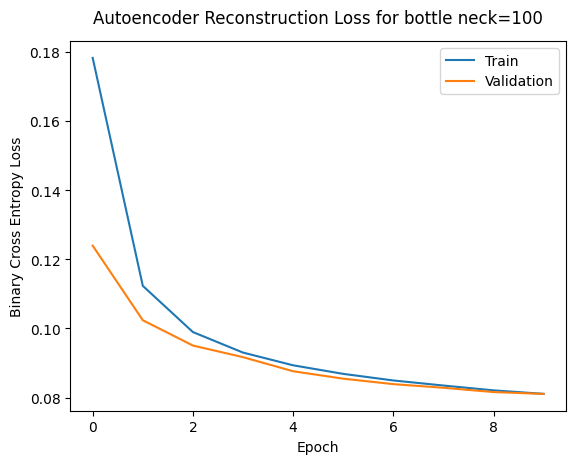

In [10]:
# Plot training and validation loss scores
# against the number of epochs.

plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.ylabel('Binary Cross Entropy Loss')
plt.xlabel('Epoch')
plt.title('Autoencoder Reconstruction Loss for bottle neck=100', pad=13)
plt.legend(loc='upper right')

### Test the autoencoder model by reconstructing the test images and visually inspecting the results.

313/313 [==============================] - 2s 7ms/step


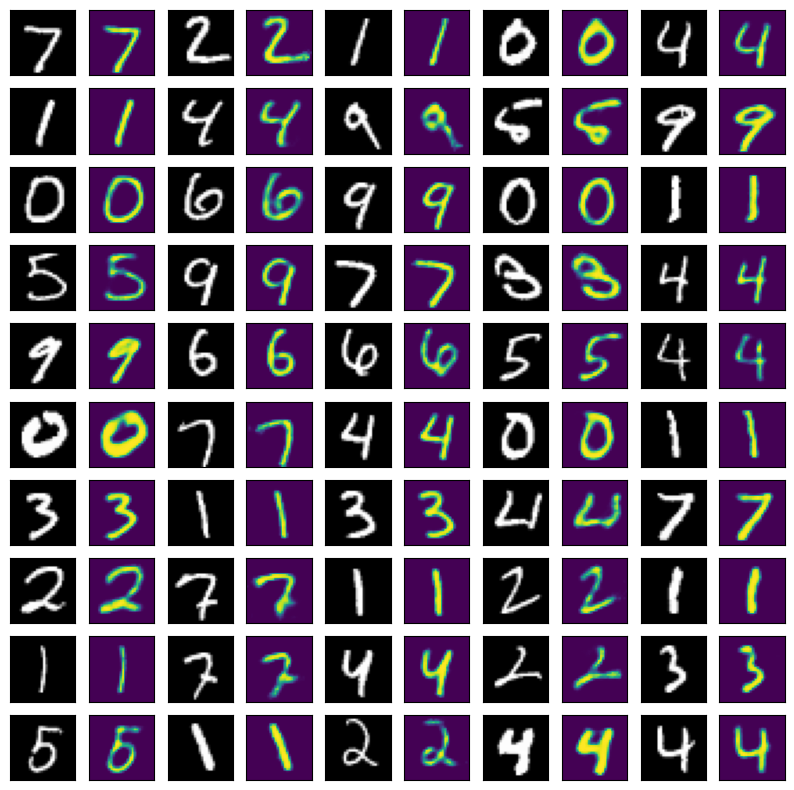

In [11]:
reconstructed_images = autoencoder.predict(test_images)

images = []
for i in range(100):
    images.append(test_images[i].reshape(28,28))
    images.append(reconstructed_images[i].reshape(28,28))
rows = 10
cols = 10
plt.figure(figsize=(10,10))
for i in range(rows*cols):
    plt.subplot(rows,cols,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if (i%2 == 0):
        plt.imshow(images[i],cmap='gray')
    else:
        plt.imshow(images[i])
plt.show()

### Summary

In the above Autoencoder Reconstruction Loss for bottle neck =6 we can clearlly observe that the model is perfroming well on train data but there is no improvement in the test data. The Binary Cross Entropy Loss value increased for test data after the train and test line intersects each other. And for the Autoencoder Reconstruction Loss for bottle neck =100 both the train and test lines are improving good as the value of Binary Cross Entropy Loss value kept decreasing.So we can conclude that for the model with bottle neck 100 is performing good when compared to the model with bottle neck 6. But if the model have 100 in the bottle neck it is not gonna filter soo much when compared to the model with 6 bottle neck. We can obsere that in the output digits(the difference is can more clearlly observed in the digits 9,6).